# Explore here

In [1]:
from dotenv import load_dotenv
load_dotenv()

import pandas as pd
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt


In [2]:
id_ = os.environ.get("CLIENT_ID")
secret = os.environ.get("CLIENT_SECRET")

credentials = SpotifyClientCredentials(client_id=id_, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager=credentials)

In [3]:
Blindg_uri = 'spotify:artist:7jxJ25p0pPjk0MStloN6o6'
results = sp.artist_top_tracks(Blindg_uri)
print(results)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7jxJ25p0pPjk0MStloN6o6'}, 'href': 'https://api.spotify.com/v1/artists/7jxJ25p0pPjk0MStloN6o6', 'id': '7jxJ25p0pPjk0MStloN6o6', 'name': 'Blind Guardian', 'type': 'artist', 'uri': 'spotify:artist:7jxJ25p0pPjk0MStloN6o6'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/4oruHZSLyTDKPNY2VQIlCS'}, 'href': 'https://api.spotify.com/v1/albums/4oruHZSLyTDKPNY2VQIlCS', 'id': '4oruHZSLyTDKPNY2VQIlCS', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273e8c8f9410e7fe5fc25910fc2', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02e8c8f9410e7fe5fc25910fc2', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851e8c8f9410e7fe5fc25910fc2', 'width': 64}], 'is_playable': True, 'name': 'Somewhere Far Beyond (Remastered 2007)', 'release_date': '1992-06-30', 'release_date_precision': 'day', 'total_tr

In [4]:
# Creamos un diccionario, imprimimos los datos de las mejores 10 canciones y los agregamos al diccionario
tracks_data = []
for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('popularity    : ' + str(track['popularity']) + ' sobre 100')
    duration_seconds = track['duration_ms'] / 1000
    minutes = int(duration_seconds // 60)
    seconds = int(duration_seconds % 60)
    print('duration: ' + str(minutes) + ' minutes ' + str(seconds) + ' seconds')
    tracks_data.append({
        'Name': track['name'],
        'Popularity': track['popularity'],
        'Duration': f'{minutes} minutes {seconds} seconds',
        'Duration seconds': duration_seconds
    })
    print()

track    : The Bard's Song - In the Forest - Remastered 2007
popularity    : 60 sobre 100
duration: 3 minutes 9 seconds

track    : Mirror Mirror - Remastered 2007
popularity    : 55 sobre 100
duration: 5 minutes 6 seconds

track    : Valhalla
popularity    : 53 sobre 100
duration: 5 minutes 13 seconds

track    : Nightfall - Remastered 2007
popularity    : 51 sobre 100
duration: 5 minutes 34 seconds

track    : Deliver Us From Evil
popularity    : 49 sobre 100
duration: 5 minutes 21 seconds

track    : Skalds and Shadows
popularity    : 49 sobre 100
duration: 3 minutes 13 seconds

track    : Lord of the Rings - Remastered 2007
popularity    : 49 sobre 100
duration: 3 minutes 15 seconds

track    : Twilight of the Gods
popularity    : 48 sobre 100
duration: 4 minutes 49 seconds

track    : Blood Of The Elves
popularity    : 45 sobre 100
duration: 4 minutes 37 seconds

track    : Violent Shadows
popularity    : 44 sobre 100
duration: 4 minutes 17 seconds



In [9]:
#Creamos el Data Frame y lo ordenamos  por popularidad
df = pd.DataFrame(tracks_data)
df_sorted = df.sort_values(by='Popularity', ascending=False)

# Cogemos los 3 más populares y los imprimimos.
top_3 = df_sorted.head(3)
print(top_3)

# Añadimos una nueva columna con la relación popularidad/duración
df['Ratio Popularity/Duration'] = df['Popularity'] / df['Duration seconds']

print(df)



                                                Name  Popularity  \
0  The Bard's Song - In the Forest - Remastered 2007          60   
1                    Mirror Mirror - Remastered 2007          55   
2                                           Valhalla          53   

               Duration  Duration seconds  
0   3 minutes 9 seconds           189.893  
1   5 minutes 6 seconds           306.013  
2  5 minutes 13 seconds           313.213  
                                                Name  Popularity  \
0  The Bard's Song - In the Forest - Remastered 2007          60   
1                    Mirror Mirror - Remastered 2007          55   
2                                           Valhalla          53   
3                        Nightfall - Remastered 2007          51   
4                               Deliver Us From Evil          49   
5                                 Skalds and Shadows          49   
6                Lord of the Rings - Remastered 2007          49   
7      

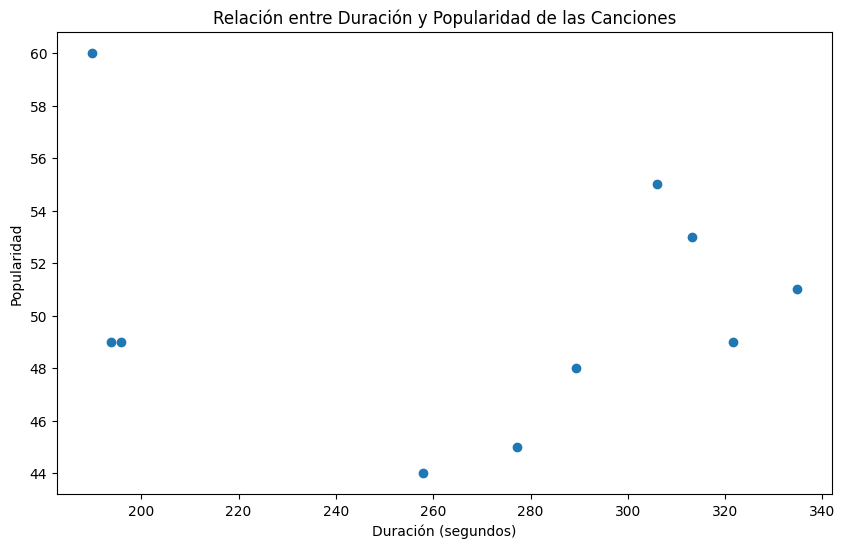

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration seconds'], df['Popularity'])
plt.title('Relación entre Duración y Popularidad de las Canciones')
plt.xlabel('Duración (segundos)')
plt.ylabel('Popularidad')
plt.show()


# ANÁLISIS
No se aprecia correlación alguna entre popularidad y duración.

No obstante, el tamaño tan pequeño de muestra (10 canciones top), no permite que afirmemos con rotundidad la falta de relación.